<a href="https://colab.research.google.com/github/micahming/lus-preds/blob/main/RANDOM_FORESTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import traceback
from glob import glob
from datetime import datetime
import openpyxl
import plotly.express as px
import pytz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree

# READ

In [ ]:
def wrangle(filepath):

    df =pd.read_excel(filepath)
    #Create timestamp
    file_name = f" {filepath} "
    file_name = file_name.replace(".xlsx.xls","").replace("/content/LUSE_STOCK/","").replace(" ","")
    formalt= '%Y-%m-%d'
    timestamp = datetime.strptime(file_name,formalt)


    #Adding Column Names
    column_row_1 = list(df.iloc[8])
    column_row_2=[str(item) for item in (list(df.iloc[9]))]
    column_row_3=[str(item) for item in (list(df.iloc[10]))]

    column_names=[]
    count = 0
    for name in column_row_1:
        freshname=column_row_1[count] + column_row_2[count]+ column_row_3[count]
        new = freshname.replace("nan","",2)
        column_names.append(new)
        count=count+1

    df.columns = column_names




    #Create StringCheck

    string_check = ['AELZ', 'ATEL', 'BATA', 'BATZ', 'CCHZ', 'CECZ', 'FARM', 'FQMZ',
           'INVE', 'LAFA', 'MAFS', 'NATB', 'PMDZ', 'PRIM', 'PUMA', 'REIZ',
           'SCBL', 'SHOP', 'ZABR', 'ZCCM', 'ZMBF', 'ZMFA', 'ZNCO', 'ZSUG']

    pattern = '|'.join(string_check)
    #Apply mask to only show companies
    cleaner=df['Instrument'].str.contains(pattern).fillna(False)
    df = df[cleaner]
    #Fill NaN Values
    df=df.fillna(0)

    #Filter for select companies
    select_companies = ['CECZ','ATEL','REIZ','SCBL','SHOP']
    string_check2 = "|".join(select_companies)
    df=df[df['Instrument'].str.contains(string_check2)]

    #Add DataFrame Date
    df['timestamp'] = [timestamp] * 5

   #Drop Columns
    # df= df.drop(columns=[ 'Bid Qty', 'BidPrice', 'AskPrice', 'Ask Qty',
    #    'LastTradePrice', 'NetChange', 'TotalTurnover',
    #    'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
    #    'OpeningPrice', 'Change%', 'PrevClosingPrice', 'TotalTrades',
    #    'TotalVolume', 'ForeignSells'], inplace =True)



    return df

In [ ]:
files = sorted(glob("/content/LUSE_STOCK/*-*-*.xlsx.xls"))


In [ ]:
frames = [wrangle(file) for file in files]



<ipython-input-2-34b4bdbd57c5>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = [timestamp] * 5


In [ ]:
atel_frames=[(frame[frame['Instrument']=='ATEL']) for frame in frames]
cecz_frames=[(frame[frame['Instrument']=='CECZ']) for frame in frames]
reiz_frames=[(frame[frame['Instrument']=='REIZ']) for frame in frames]
scbl_frames=[(frame[frame['Instrument']=='SCBL']) for frame in frames]
shop_frames=[(frame[frame['Instrument']=='SHOP']) for frame in frames]

In [ ]:
final_atel_frame= pd.concat(atel_frames).fillna(0)
final_cecz_frame= pd.concat(cecz_frames).fillna(0)
final_reiz_frame= pd.concat(reiz_frames).fillna(0)
final_scbl_frame= pd.concat(scbl_frames).fillna(0)
final_shop_frame= pd.concat(shop_frames).fillna(0)

In [ ]:
final_scbl_frame.head(100)

,Instrument,Bid Qty,BidPrice,AskPrice,Ask Qty,LastTradePrice,NetChange,ClosingPrice,TotalTurnover,AveragePrice,...,52 WeekLow,OpeningPrice,Change%,PrevClosingPrice,TotalTrades,TotalVolume,ForeignBuys,ForeignSells,timestamp,ForeignBuy
27,SCBL,0,0.0,1.63,13500,1.63,0.0,1.63,1305.63,1.63,...,1.63,1.63,0.0,1.63,3,801,0,0,2020-01-02,0.0
27,SCBL,0,0.0,1.63,13500,0.00,0.0,1.63,0.00,0.00,...,1.63,1.63,0.0,1.63,0,0,0,0,2020-01-03,0.0
27,SCBL,0,0.0,1.63,13500,0.00,0.0,1.63,0.00,0.00,...,1.63,1.63,0.0,1.63,0,0,0,0,2020-01-06,0.0
27,SCBL,0,0.0,1.63,17400,1.63,0.0,1.63,971.48,1.63,...,1.63,1.63,0.0,1.63,9,596,0,0,2020-01-07,0.0
27,SCBL,0,0.0,1.63,17400,0.00,0.0,1.63,0.00,0.00,...,1.63,1.63,0.0,1.63,0,0,0,0,2020-01-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,SCBL,0,0.0,1.50,59066,0.00,0.0,1.50,0.00,0.00,...,1.50,1.50,0.0,1.50,0,0,0,0,2020-05-21,0.0
27,SCBL,0,0.0,1.50,59066,0.00,0.0,1.50,0.00,0.00,...,1.50,1.50,0.0,1.50,0,0,0,0,2020-05-22,0.0
27,SCBL,0,0.0,1.50,59066,0.00,0.0,1.50,0.00,0.00,...,1.50,1.50,0.0,1.50,0,0,0,0,2020-05-26,0.0
27,SCBL,0,0.0,1.50,59066,0.00,0.0,1.50,0.00,0.00,...,1.50,1.50,0.0,1.50,0,0,0,0,2020-05-27,0.0


In [ ]:
final_atel_frame=final_atel_frame.drop(columns=['Bid Qty', 'BidPrice',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%',  'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_cecz_frame=final_cecz_frame.drop(columns=['Bid Qty', 'BidPrice',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%',  'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_reiz_frame=final_reiz_frame.drop(columns=['Bid Qty', 'BidPrice',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%',  'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_scbl_frame=final_scbl_frame.drop(columns=['Bid Qty', 'BidPrice',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%',  'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])
final_shop_frame=final_shop_frame.drop(columns=['Bid Qty', 'BidPrice',
       'LastTradePrice', 'NetChange','TotalTurnover',
       'AveragePrice', 'LastTradedSize', '52 WeekHigh', '52 WeekLow',
       'OpeningPrice', 'Change%',  'TotalTrades',
       'TotalVolume', 'ForeignBuys', 'ForeignSells','ForeignBuy'])

In [ ]:
atel_time_series=final_atel_frame.set_index('timestamp').drop(columns='Instrument')
cecz_time_series=final_cecz_frame.set_index('timestamp').drop(columns='Instrument')
reiz_time_series=final_reiz_frame.set_index('timestamp').drop(columns='Instrument')
scbl_time_series=final_scbl_frame.set_index('timestamp').drop(columns='Instrument')
shop_time_series=final_shop_frame.set_index('timestamp').drop(columns='Instrument')

In [ ]:
aligned_atel= atel_time_series.asfreq('b').fillna(method='ffill')
aligned_cecz= cecz_time_series.asfreq('b').fillna(method='ffill')
aligned_reiz= reiz_time_series.asfreq('b').fillna(method='ffill')
aligned_scbl= scbl_time_series.asfreq('b').fillna(method='ffill')
aligned_shop= shop_time_series.asfreq('b').fillna(method='ffill')

In [ ]:
aligned_atel.info()
aligned_atel.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1075 entries, 2020-01-02 to 2024-02-14
Freq: B
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AskPrice          1075 non-null   float64
 1   Ask Qty           1075 non-null   float64
 2   ClosingPrice      1075 non-null   float64
 3   PrevClosingPrice  1075 non-null   float64
dtypes: float64(4)
memory usage: 42.0 KB


,AskPrice,Ask Qty,ClosingPrice,PrevClosingPrice
timestamp,,,,
2020-01-02,0.00,0.0,31.48,31.48
2020-01-03,0.00,0.0,31.48,31.48
2020-01-06,31.48,354.0,31.48,31.48
2020-01-07,31.48,354.0,31.48,31.48
2020-01-08,31.48,354.0,31.48,31.48


# ATEL MODEL

## SPLIT

In [ ]:
X_atel = aligned_atel.drop('ClosingPrice',axis=1)
y_atel = aligned_atel['ClosingPrice']

In [ ]:
X_train_atel, X_test_atel, y_train_atel, y_test_atel = train_test_split(X_atel, y_atel, test_size=0.3, random_state=42)

## BUILD MODEL

In [ ]:

regressor_atel = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor_atel.fit(X_train_atel, y_train_atel)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_atel = regressor_atel.predict(X_test_atel)

## EVALUATE

In [ ]:
df_atel=pd.DataFrame({'Actual':y_test_atel, 'Predicted':y_pred_atel})
df_atel

,Actual,Predicted
timestamp,,
2021-08-24,29.48,29.480000
2021-03-15,29.49,29.490000
2021-03-05,29.49,29.490000
2020-07-17,29.49,29.490000
2021-01-19,29.49,29.490000
...,...,...
2020-04-10,31.48,31.480000
2020-05-13,29.49,29.490000
2020-02-18,31.48,31.480567


In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_atel, y_pred_atel))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_atel, y_pred_atel))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_atel, y_pred_atel)))


Mean Absolute Error: 0.0649301328239711
Mean Squared Error: 0.18366069828055745
Root Mean Squared Error: 0.428556528687357


In [ ]:
# Calculate the absolute errors
errors_atel = abs(y_pred_atel - y_test_atel)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_atel), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_atel = 100 * (errors_atel / y_test_atel)
# Calculate and display accuracy
accuracy_atel = 100 - np.mean(mape_atel)
print('Accuracy:', round(accuracy_atel, 2), '%.')


Mean Absolute Error: 0.06 degrees.
Accuracy: 99.75 %.


<ipython-input-39-d6e817a29608>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_atel, hist=False, color="r", label="Actual Value")
<ipython-input-39-d6e817a29608>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_atel, hist=False, color="b", label="Fitted Values" 

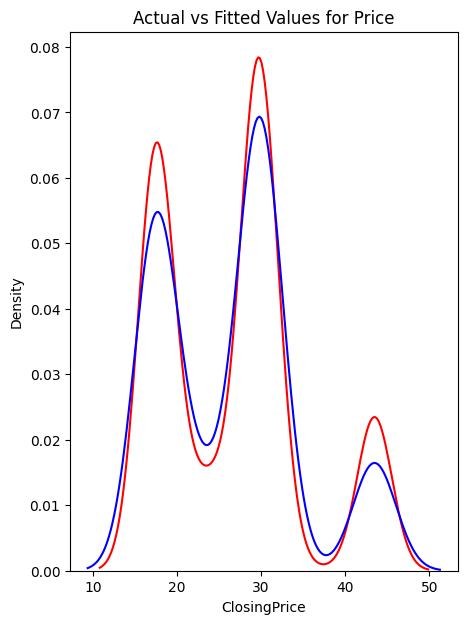

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_atel, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_atel, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

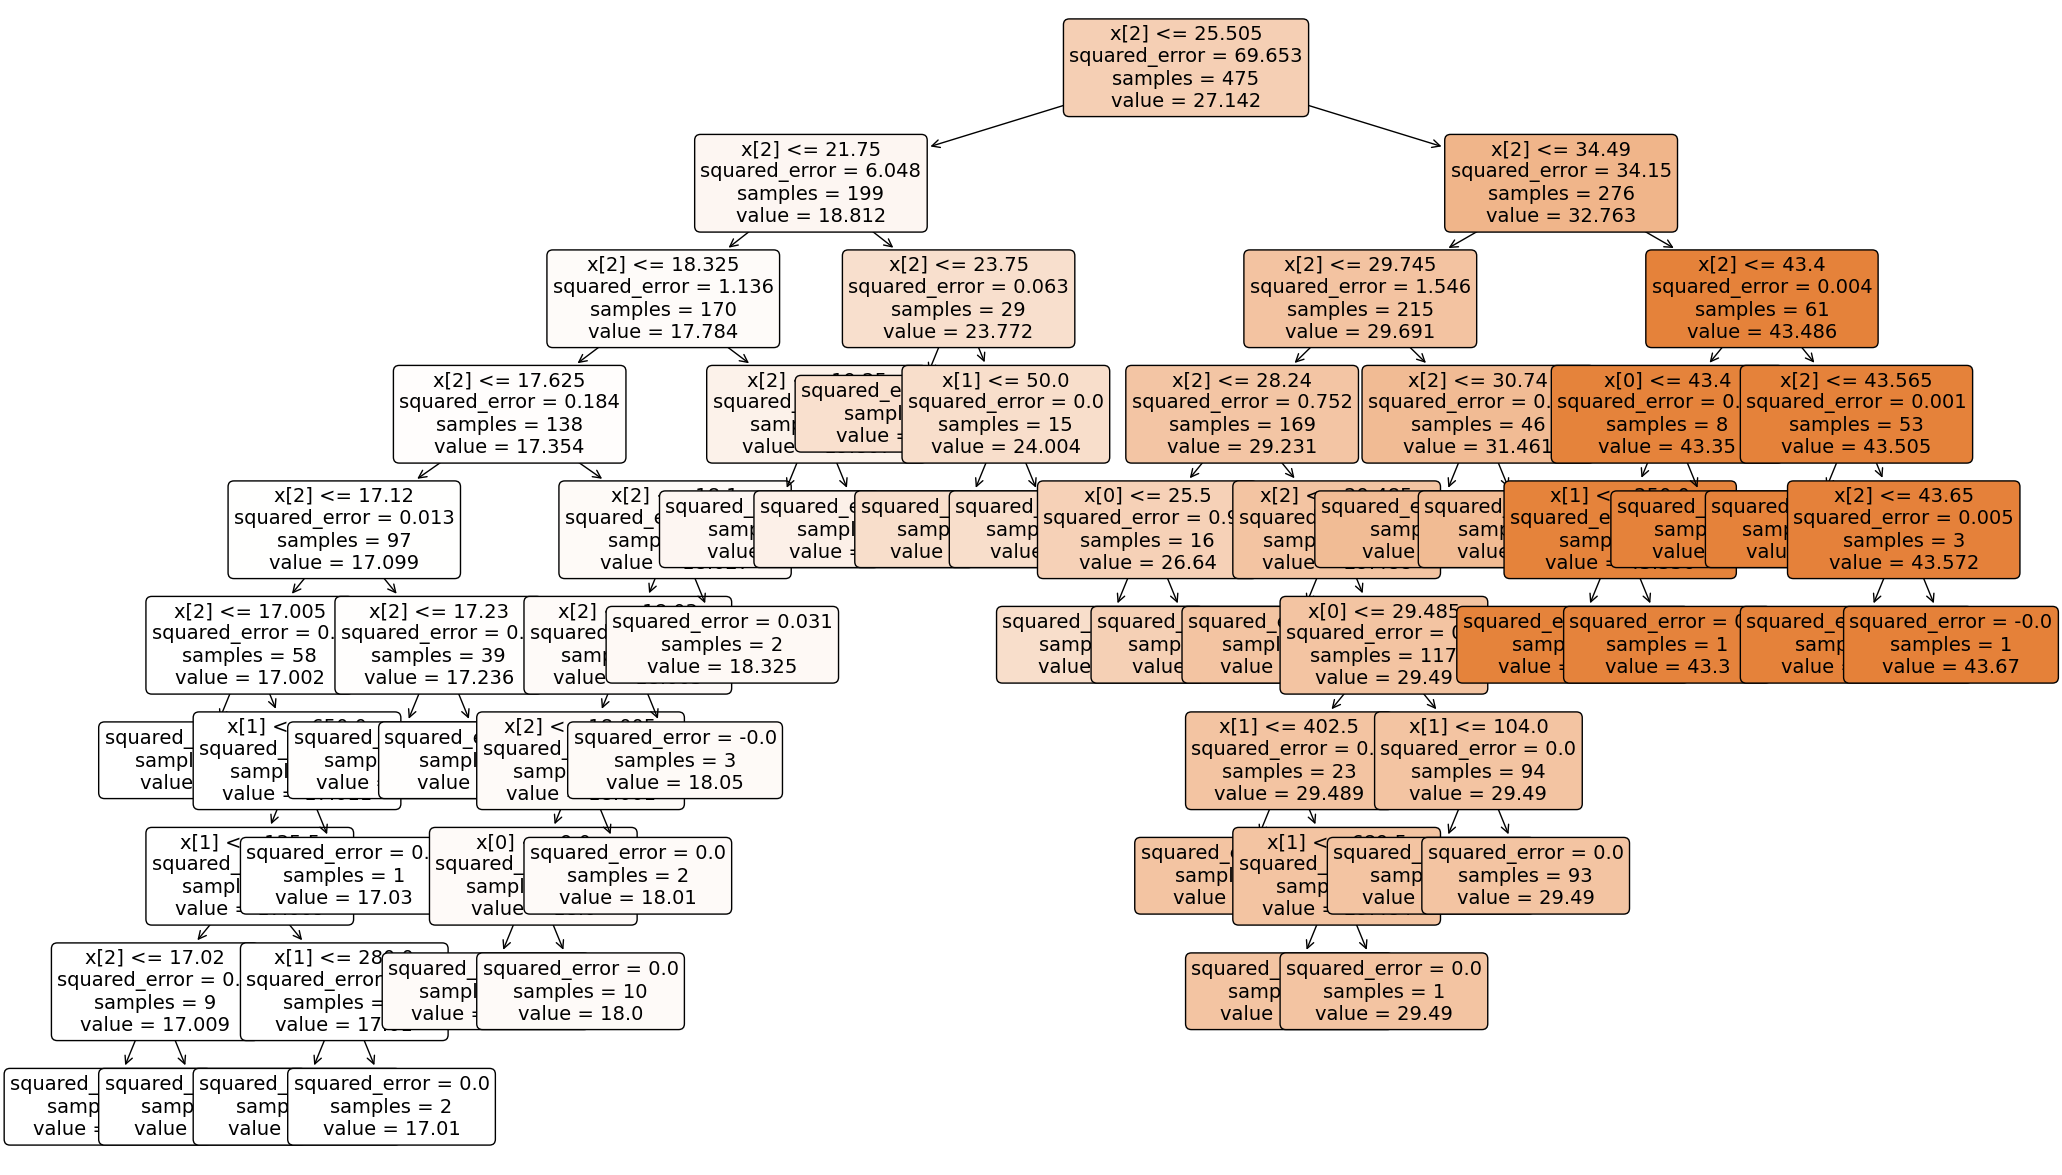

In [ ]:

# Pull out one tree from the forest
Tree_atel = regressor_atel.estimators_[5]
# Export the image to a dot file

plt.figure(figsize=(25,15))
tree.plot_tree(Tree_atel,filled=True,
              rounded=True,
              fontsize=14);

# CECZ

## SPLIT

In [ ]:
X_cecz = aligned_cecz.drop('ClosingPrice',axis=1)
y_cecz = aligned_cecz['ClosingPrice']

In [ ]:
X_train_cecz, X_test_cecz, y_train_cecz, y_test_cecz = train_test_split(X_cecz, y_cecz, test_size=0.3, random_state=42)

## BUILD MODEL

In [ ]:

regressor_cecz = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor_cecz.fit(X_train_cecz, y_train_cecz)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_cecz = regressor_cecz.predict(X_test_cecz)

## EVALUATE

In [ ]:
df_cecz=pd.DataFrame({'Actual':y_test_cecz, 'Predicted':y_pred_cecz})
df_cecz

,Actual,Predicted
timestamp,,
2021-08-24,1.40,1.392762
2021-03-15,1.25,1.254115
2021-03-05,1.25,1.250000
2020-07-17,0.71,0.716000
2021-01-19,1.10,1.100000
...,...,...
2020-04-10,1.00,0.997200
2020-05-13,1.03,1.035200
2020-02-18,1.23,1.229221


In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_cecz, y_pred_cecz))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_cecz, y_pred_cecz))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_cecz, y_pred_cecz)))


Mean Absolute Error: 0.016857585817019446
Mean Squared Error: 0.003143761109692231
Root Mean Squared Error: 0.05606925280126561


In [ ]:
# Calculate the absolute errors
errors_cecz = abs(y_pred_cecz - y_test_cecz)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_cecz), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_cecz = 100 * (errors_cecz / y_test_cecz)
# Calculate and display accuracy
accuracy_cecz = 100 - np.mean(mape_cecz)
print('Accuracy:', round(accuracy_cecz, 2), '%.')


Mean Absolute Error: 0.02 degrees.
Accuracy: 99.2 %.


<ipython-input-48-c07a045ec457>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_cecz, hist=False, color="r", label="Actual Value")
<ipython-input-48-c07a045ec457>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_cecz, hist=False, color="b", label="Fitted Values" 

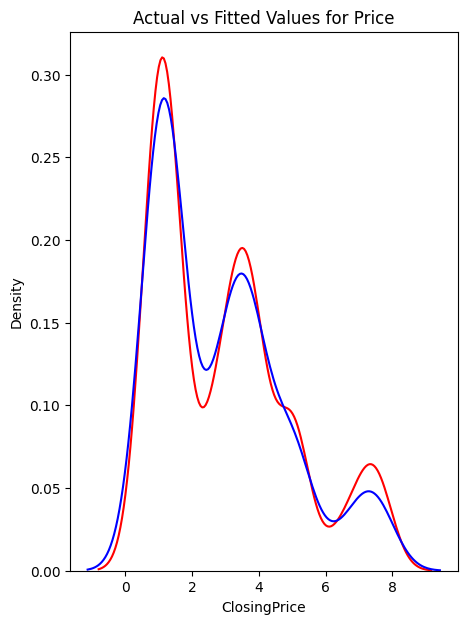

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_cecz, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_cecz, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

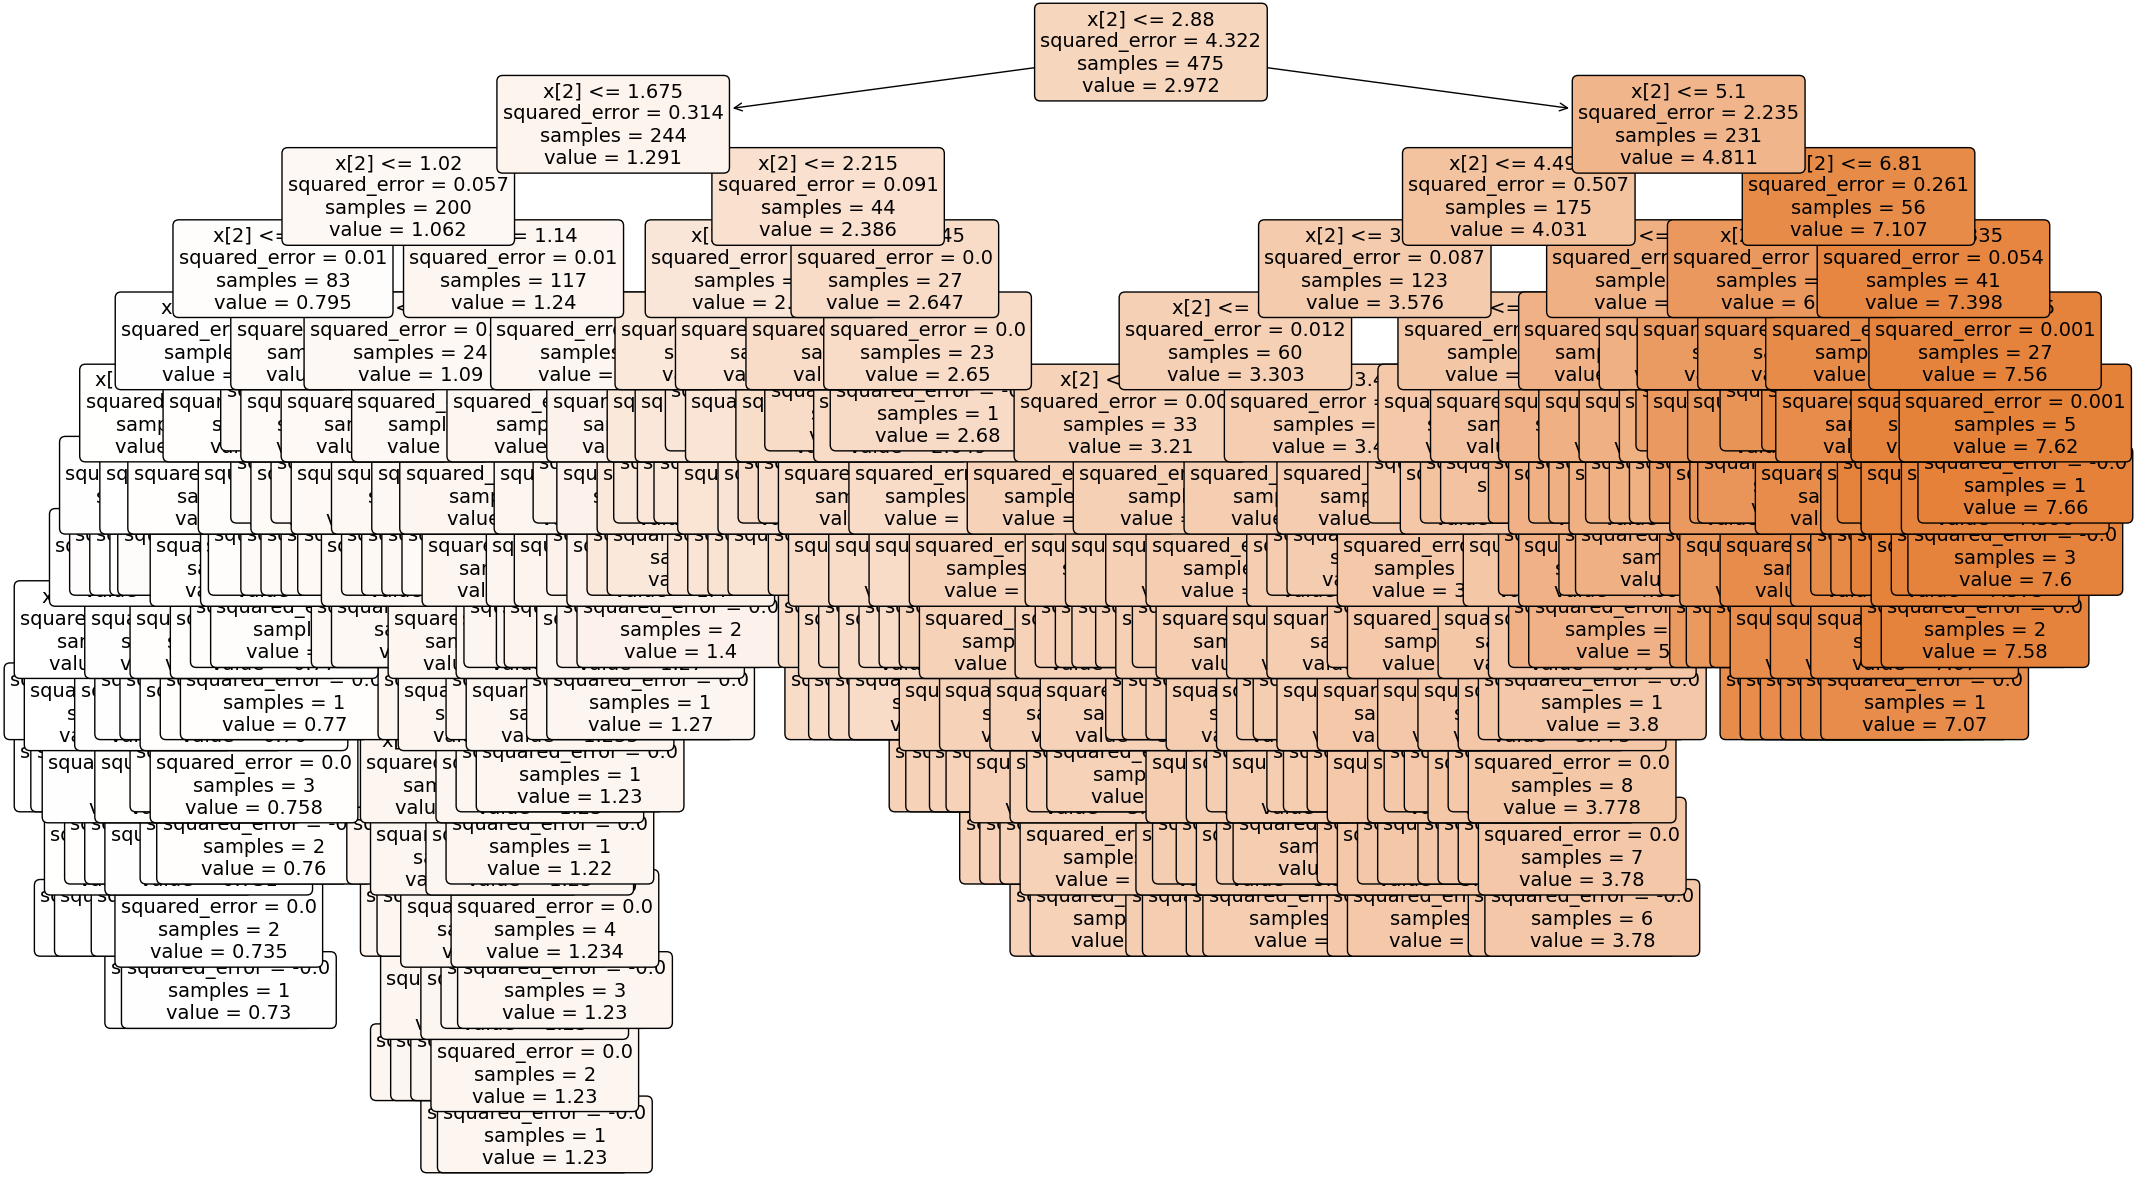

In [ ]:

# Pull out one tree from the forest
Tree_cecz = regressor_cecz.estimators_[5]
# Export the image to a dot file

plt.figure(figsize=(25,15))
tree.plot_tree(Tree_cecz,filled=True,
              rounded=True,
              fontsize=14);

# REIZ MODEL

## SPLIT

In [ ]:
X_reiz = aligned_reiz.drop('ClosingPrice',axis=1)
y_reiz = aligned_reiz['ClosingPrice']

In [ ]:
X_train_reiz, X_test_reiz, y_train_reiz, y_test_reiz = train_test_split(X_reiz, y_reiz, test_size=0.3, random_state=42)

## BUILD MODEL

In [ ]:

regressor_reiz = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor_reiz.fit(X_train_reiz, y_train_reiz)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_reiz = regressor_reiz.predict(X_test_reiz)

## EVALUATE

In [ ]:
df_reiz=pd.DataFrame({'Actual':y_test_reiz, 'Predicted':y_pred_reiz})
df_reiz

,Actual,Predicted
timestamp,,
2021-08-24,1.25,1.250652
2021-03-15,0.54,0.518500
2021-03-05,0.53,0.540000
2020-07-17,3.34,3.340000
2021-01-19,0.39,0.391784
...,...,...
2020-04-10,4.45,4.450000
2020-05-13,4.45,4.450000
2020-02-18,4.49,4.490000


In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_reiz, y_pred_reiz))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_reiz, y_pred_reiz))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_reiz, y_pred_reiz)))


Mean Absolute Error: 0.006567269644963603
Mean Squared Error: 0.0009650138689002588
Root Mean Squared Error: 0.031064672361064083


In [ ]:
# Calculate the absolute errors
errors_reiz = abs(y_pred_reiz - y_test_reiz)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_reiz), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_reiz = 100 * (errors_reiz / y_test_reiz)
# Calculate and display accuracy
accuracy_reiz = 100 - np.mean(mape_reiz)
print('Accuracy:', round(accuracy_reiz, 2), '%.')


Mean Absolute Error: 0.01 degrees.
Accuracy: 99.36 %.


<ipython-input-57-8515f4e127af>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_reiz, hist=False, color="r", label="Actual Value")
<ipython-input-57-8515f4e127af>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_reiz, hist=False, color="b", label="Fitted Values" 

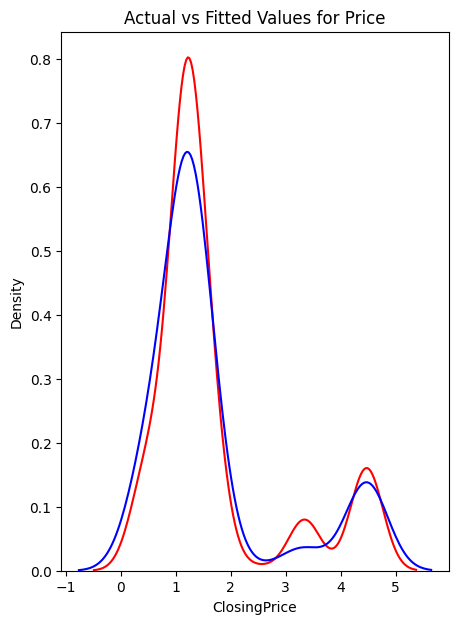

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_reiz, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_reiz, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

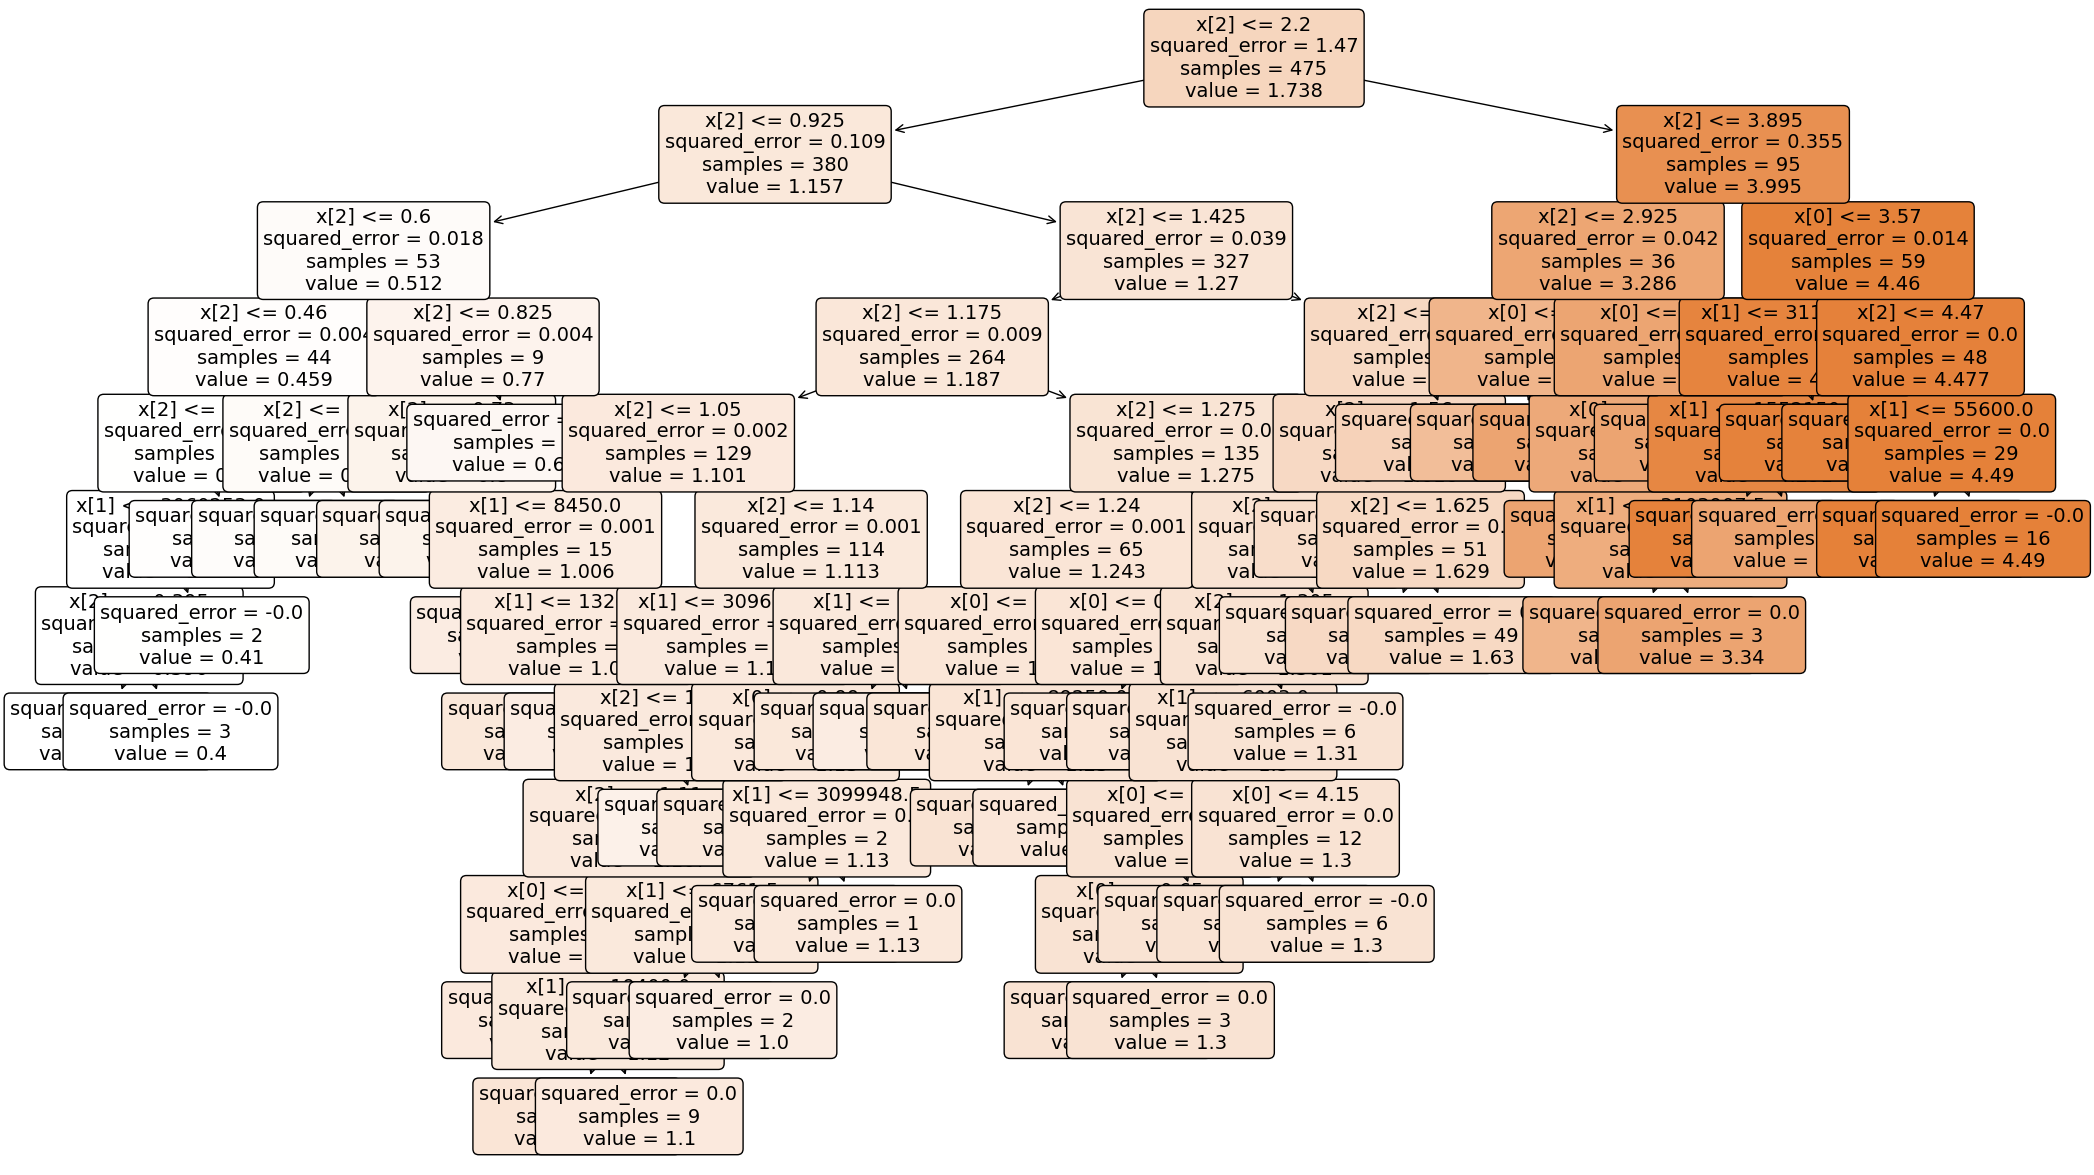

In [ ]:

# Pull out one tree from the forest
Tree_reiz = regressor_reiz.estimators_[5]
# Export the image to a dot file

plt.figure(figsize=(25,15))
tree.plot_tree(Tree_reiz,filled=True,
              rounded=True,
              fontsize=14);

# SCBL MODEL

## SPLIT

In [ ]:
X_scbl = aligned_scbl.drop('ClosingPrice',axis=1)
y_scbl = aligned_scbl['ClosingPrice']

In [ ]:
X_train_scbl, X_test_scbl, y_train_scbl, y_test_scbl = train_test_split(X_scbl, y_scbl, test_size=0.3, random_state=42)

## BUILD MODEL

In [ ]:

regressor_scbl = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor_scbl.fit(X_train_scbl, y_train_scbl)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_scbl = regressor_scbl.predict(X_test_scbl)

## EVALUATE

In [ ]:
df_scbl=pd.DataFrame({'Actual':y_test_scbl, 'Predicted':y_pred_scbl})
df_scbl

,Actual,Predicted
timestamp,,
2021-08-24,1.23,1.239500
2021-03-15,1.30,1.314500
2021-03-05,1.36,1.358800
2020-07-17,1.48,1.481188
2021-01-19,1.40,1.400000
...,...,...
2020-04-10,1.55,1.549500
2020-05-13,1.50,1.499500
2020-02-18,1.63,1.630000


In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_scbl, y_pred_scbl))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_scbl, y_pred_scbl))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_scbl, y_pred_scbl)))


Mean Absolute Error: 0.011004024736939868
Mean Squared Error: 0.0007230264470396555
Root Mean Squared Error: 0.026889151102994224


In [ ]:
# Calculate the absolute errors
errors_scbl = abs(y_pred_scbl - y_test_scbl)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_scbl), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_scbl = 100 * (errors_scbl / y_test_scbl)
# Calculate and display accuracy
accuracy_scbl = 100 - np.mean(mape_scbl)
print('Accuracy:', round(accuracy_scbl, 2), '%.')


Mean Absolute Error: 0.01 degrees.
Accuracy: 99.13 %.


<ipython-input-66-50ee438599ec>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_scbl, hist=False, color="r", label="Actual Value")
<ipython-input-66-50ee438599ec>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_scbl, hist=False, color="b", label="Fitted Values" 

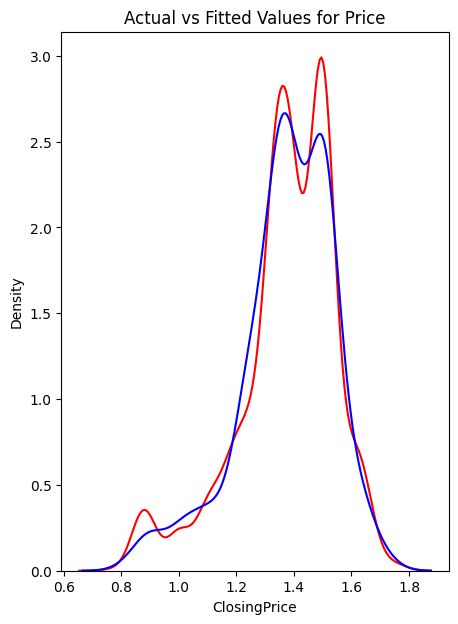

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_scbl, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_scbl, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

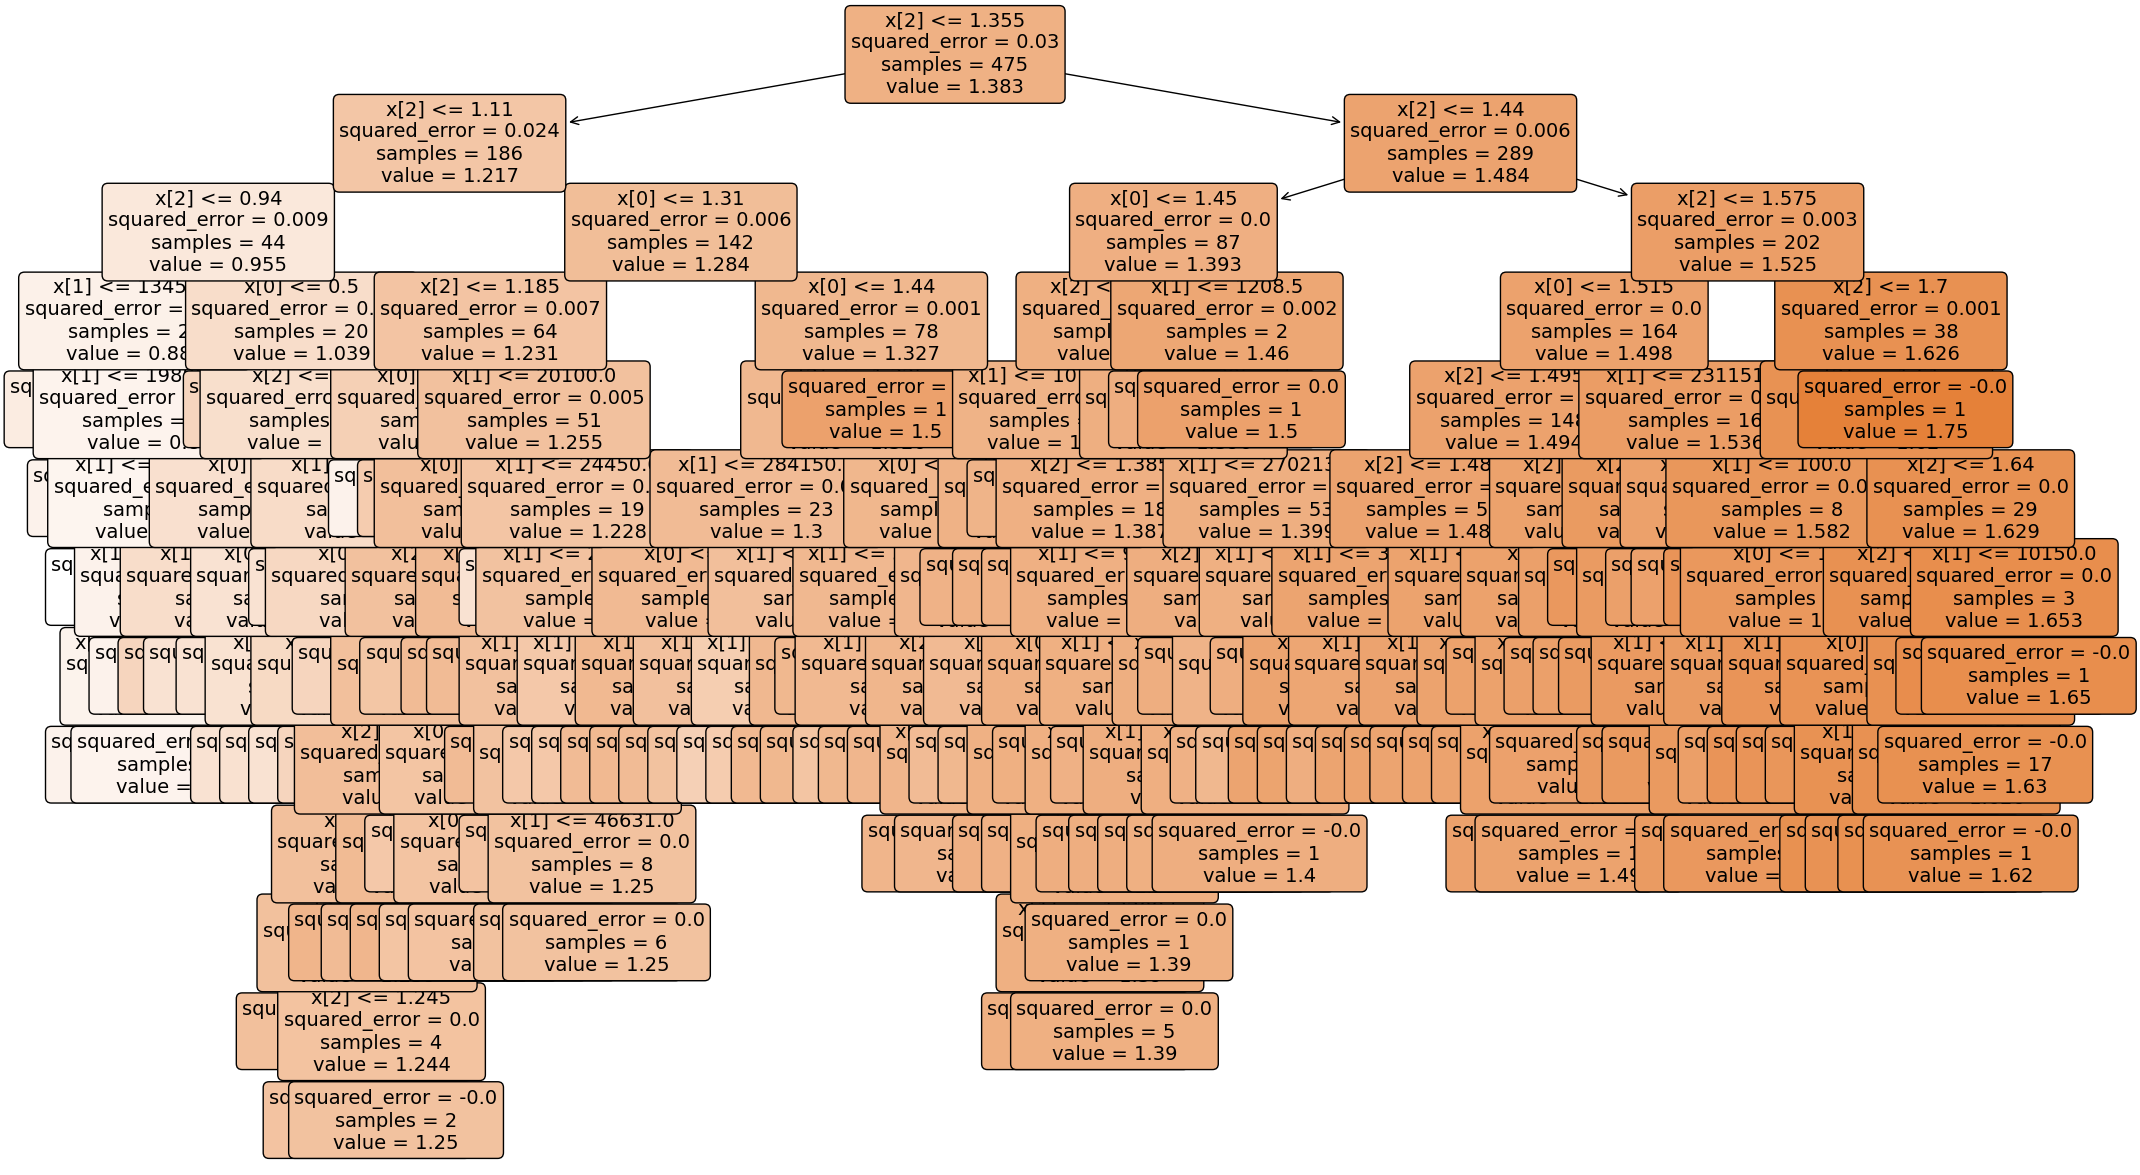

In [ ]:

# Pull out one tree from the forest
Tree_scbl = regressor_scbl.estimators_[5]
# Export the image to a dot file

plt.figure(figsize=(25,15))
tree.plot_tree(Tree_scbl,filled=True,
              rounded=True,
              fontsize=14);

# SHOP MODEL

## SPLIT

In [ ]:
X_shop = aligned_shop.drop('ClosingPrice',axis=1)
y_shop = aligned_shop['ClosingPrice']

In [ ]:
X_train_shop, X_test_shop, y_train_shop, y_test_shop = train_test_split(X_shop, y_shop, test_size=0.3, random_state=42)

## BUILD MODEL

In [ ]:

regressor_shop = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor_shop.fit(X_train_shop, y_train_shop)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_shop = regressor_shop.predict(X_test_shop)

## EVALUATE

In [ ]:
df_shop=pd.DataFrame({'Actual':y_test_shop, 'Predicted':y_pred_shop})
df_shop

,Actual,Predicted
timestamp,,
2021-08-24,64.00,64.00
2021-03-15,62.99,62.99
2021-03-05,62.99,62.99
2020-07-17,63.00,63.00
2021-01-19,63.00,63.00
...,...,...
2020-04-10,63.00,63.00
2020-05-13,63.00,63.00
2020-02-18,63.00,63.00


In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_shop, y_pred_shop))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_shop, y_pred_shop))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_shop, y_pred_shop)))


Mean Absolute Error: 0.003126934984539982
Mean Squared Error: 0.0030349845201229366
Root Mean Squared Error: 0.0550906935890531


In [ ]:
# Calculate the absolute errors
errors_shop = abs(y_pred_shop - y_test_shop)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_shop), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_shop = 100 * (errors_shop / y_test_shop)
# Calculate and display accuracy
accuracy_shop = 100 - np.mean(mape_shop)
print('Accuracy:', round(accuracy_shop, 2), '%.')


Mean Absolute Error: 0.0 degrees.
Accuracy: 100.0 %.


<ipython-input-75-2b005d706273>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_shop, hist=False, color="r", label="Actual Value")
<ipython-input-75-2b005d706273>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_shop, hist=False, color="b", label="Fitted Values" 

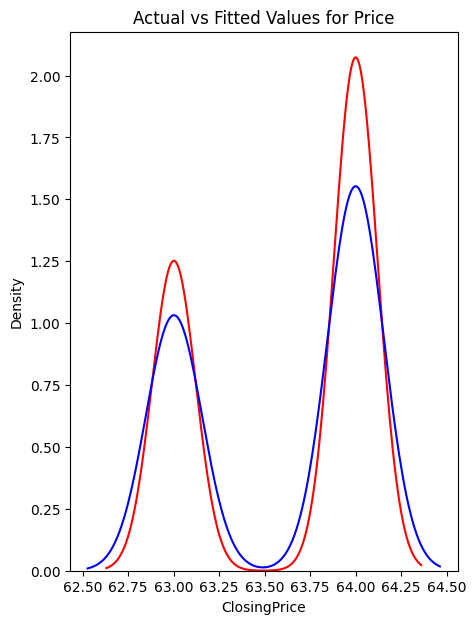

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_shop, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_shop, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

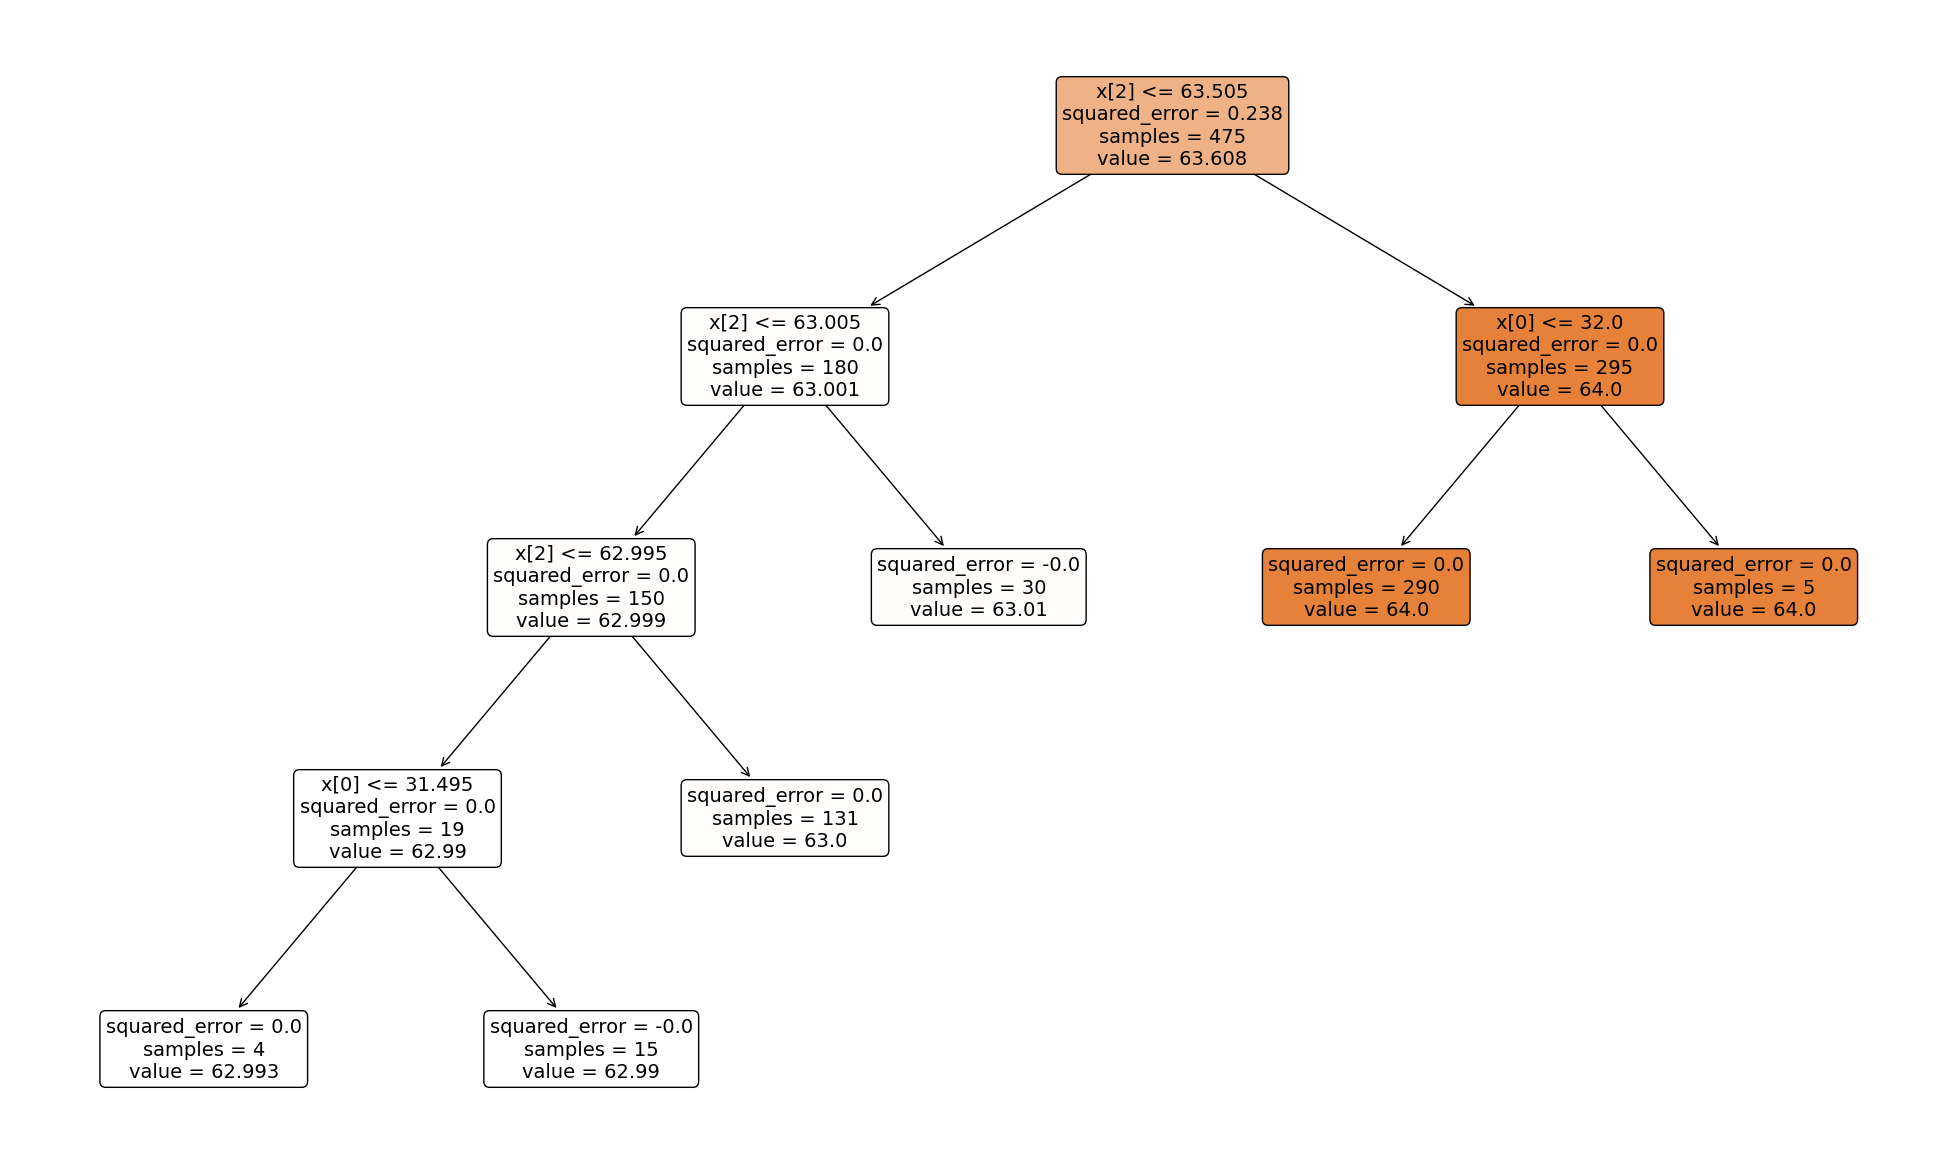

In [ ]:

# Pull out one tree from the forest
Tree_shop = regressor_shop.estimators_[5]
# Export the image to a dot file

plt.figure(figsize=(25,15))
tree.plot_tree(Tree_shop,filled=True,
              rounded=True,
              fontsize=14);

# CLASSIFIER CODE

In [ ]:
#sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
#sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
#sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#train = sp500.iloc[:-100]
#test = sp500.iloc[-100:]

#predictors = ["Close", "Volume", "Open", "High", "Low"]
#model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
#from sklearn.metrics import precision_score

#preds = model.predict(test[predictors])
#preds = pd.Series(preds, index=test.index)
# precision_score(test["Target"], preds)

0.47058823529411764

<AxesSubplot:xlabel='Date'>

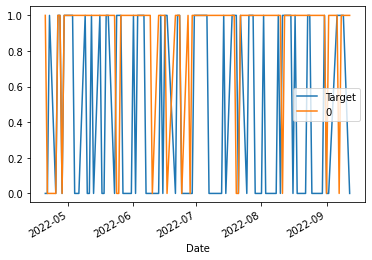

In [ ]:
# combined = pd.concat([test["Target"], preds], axis=1)
# combined.plot()

In [ ]:
# def predict(train, test, predictors, model):
#     model.fit(train[predictors], train["Target"])
#     preds = model.predict(test[predictors])
#     preds = pd.Series(preds, index=test.index, name="Predictions")
#     combined = pd.concat([test["Target"], preds], axis=1)
#     return combined

In [ ]:
# def backtest(data, model, predictors, start=2500, step=250):
#     all_predictions = []

#     for i in range(start, data.shape[0], step):
#         train = data.iloc[0:i].copy()
#         test = data.iloc[i:(i+step)].copy()
#         predictions = predict(train, test, predictors, model)
#         all_predictions.append(predictions)

#     return pd.concat(all_predictions)

In [ ]:
#predictions = backtest(sp500, model, predictors)

In [ ]:
#predictions["Predictions"].value_counts()

0    3337
1    2401
Name: Predictions, dtype: int64

In [ ]:
#precision_score(predictions["Target"], predictions["Predictions"])

0.534777176176593

In [ ]:
#predictions["Target"].value_counts() / predictions.shape[0]

1    0.536075
0    0.463925
Name: Target, dtype: float64

In [ ]:
# horizons = [2,5,60,250,1000]
# new_predictors = []

# for horizon in horizons:
#     rolling_averages = sp500.rolling(horizon).mean()

#     ratio_column = f"Close_Ratio_{horizon}"
#     sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

#     trend_column = f"Trend_{horizon}"
#     sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

#     new_predictors+= [ratio_column, trend_column]

In [ ]:
#sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [ ]:
#sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1,0.997948,0.0,0.989893,1.0,0.982136,26.0,0.902791,120.0,1.103594,542.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1,1.009087,1.0,1.008370,2.0,0.999819,27.0,0.919786,121.0,1.123489,543.0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1,1.003294,2.0,1.012411,3.0,1.005349,28.0,0.926253,122.0,1.130564,543.0


In [ ]:
#model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
#def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
#predictions = backtest(sp500, model, new_predictors)

In [ ]:
#predictions["Predictions"].value_counts()

0.0    3933
1.0     805
Name: Predictions, dtype: int64

In [ ]:
#precision_score(predictions["Target"], predictions["Predictions"])

0.5701863354037268

In [ ]:
#predictions["Target"].value_counts() / predictions.shape[0]

1    0.546855
0    0.453145
Name: Target, dtype: float64

In [ ]:
#predictions

,Target,Predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,1.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2022-09-06,1,0.0
2022-09-07,1,0.0
2022-09-08,1,0.0
